Kampala Statisitics data:  
Mean: 1477 
Median: 1460.0 
Variance: 42601.11111111111 
Standard deviation: 206.40036606341354

Wakiso Statisitics data:  
Mean: 1280 
Median: 1260.0 
Variance: 60066.666666666664 
Standard deviation: 245.085019262024

Gulu Statisitics data:  
Mean: 389.5 
Median: 382.5 
Variance: 2885.8333333333335 
Standard deviation: 53.71995284187555

Kampala Projected Statisitics data:  
Mean: 2159.8 
Median: 2057 
Variance: 85863.7 
Standard deviation: 293.02508425047847

Wakiso Projected Statisitics data:  
Mean: 2003.6 
Median: 1908 
Variance: 73899.3 
Standard deviation: 271.84425688250246

Gulu Projected Statisitics data:  
Mean: 575.6 
Median: 548 
Variance: 6086.3 
Standard deviation: 78.01474219658743

For Kampala:  Actual Var = 42601.11, Projected Var = 85863.70 ,Hence the  Actual Variance is less than Projected Variance


For Wakiso:  Actual Var = 60066.67, Projected Var = 73899.30 ,Hence the  Actual Variance is less than Projected Variance


For Gulu:  Actua

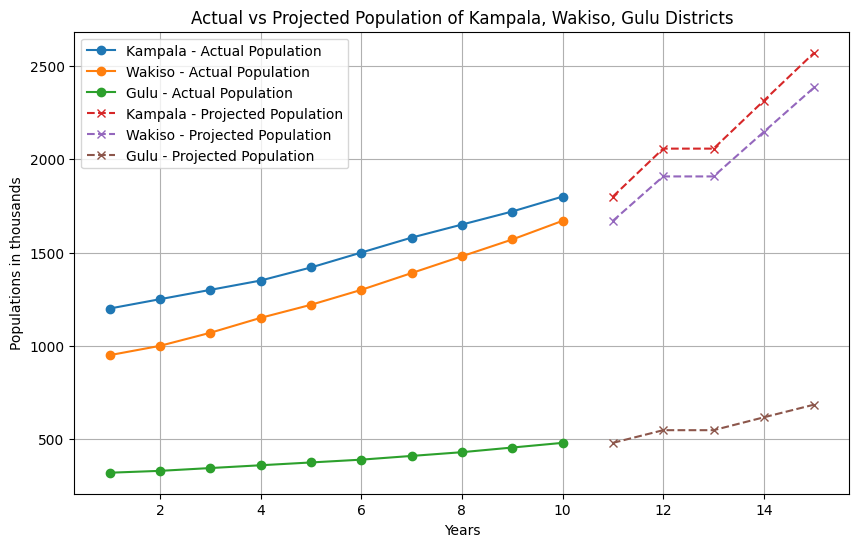

In [1]:

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import statistics as stat
import math
from scipy.linalg import solve

#-------------------------------------------------------------------------#
#  James Semate - B35825/S25M25/014     written using python3.13 or  3.11 #
#-------------------------------------------------------------------------#

# Question 1: UBOS Multi-District Population & Growth Forecast

Kampala = [1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800]
Wakiso = [950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670]
Gulu = [320, 330, 345, 360, 375, 390, 410, 430, 455, 480]
#for Qn 1.1. (Store data as Numpy array)
KampalaArray =  np.array([1200, 1250, 1300, 1350, 1420, 1500, 1580, 1650, 1720, 1800])
WakisoArray =  np.array([950, 1000, 1070, 1150, 1220, 1300, 1390, 1480, 1570, 1670])
GuluArray =  np.array([320, 330, 345, 360, 375, 390, 410, 430, 455, 480])

#for Qn 1.2.  (use stat module)
def ComputeStatistics(data,districtName):
    print( districtName + " Statisitics data: ", "\nMean:", stat.mean(data), "\nMedian:", stat.median(data), \
          "\nVariance:", stat.variance(data), "\nStandard deviation:", stat.stdev(data),end="\n\n")


ComputeStatistics(Kampala, "Kampala")
ComputeStatistics(Wakiso, "Wakiso")
ComputeStatistics(Gulu, "Gulu")

#for Qn 1.3. (Generate a Fibonacci sequence of length 5) , n equals to years
KampalaProjectedData =[]
WakisoProjectedData =  []
GuluProjectedData =  []

def fibonacciSeq(n):
    fib=np.zeros(n, dtype=int)

    fib[0]=0
    fib[1]=1
    for k in range(n-2):
        fib[k+2] = fib[k+1]+fib[k]
    #print("Fibonnacci sequence for the next 5 years for: ",fib.tolist())

    return fib.tolist()

def fibonacciSeqGrowthWeights(n): #growth weights
    #sum of elements in Fibonnacci sequence
    total=sum(fibonacciSeq(n))
    growthWeights=[]
    for k in fibonacciSeq(n):
        growthWeights.append((k/total))
    #print("growth Weights: ",growthWeights)
    return growthWeights
fibonacciSeqGrowthWeights(5)


def fibonacciSeqGrowthProjection(n,initialValue,districtName):
    #Projections=initialValue×(1+weight)
    projectedData=[]
    for k in (fibonacciSeqGrowthWeights(n)):
        projectedData.append(int(initialValue*(1+ k)))

    #print("Fibonnacci sequence for the next 5 years for "+ districtName + "District:",projectedData)

    return projectedData


#####Projected data statistics for kampala
KampalaProjectedData=fibonacciSeqGrowthProjection(5,Kampala[-1],"Kampala ")
WakisoProjectedData=fibonacciSeqGrowthProjection(5,Wakiso[-1],"Wakiso ")
GuluProjectedData=fibonacciSeqGrowthProjection(5,Gulu[-1],"Gulu ")

ComputeStatistics(KampalaProjectedData, "Kampala Projected")
ComputeStatistics(WakisoProjectedData, "Wakiso Projected")
ComputeStatistics(GuluProjectedData, "Gulu Projected")
# Qn1.4. Compare variance
def compareVariance(actualData,projectedData,districtName):
    actual_var = stat.variance(actualData)
    proj_var = stat.variance(projectedData)
    compareText=""
    if actual_var < proj_var:
        compareText="Actual Variance is less than Projected Variance"
    else:
        compareText="Actual Variance is greater than Projected Variance"
    print("For "+districtName+":" ,f" Actual Var = {actual_var:.2f}, Projected Var = {proj_var:.2f}",",Hence the ",compareText+"\n\n")


compareVariance(Kampala,KampalaProjectedData,"Kampala")
compareVariance(Wakiso,WakisoProjectedData,"Wakiso")
compareVariance(Gulu,GuluProjectedData,"Gulu")
print("\n\n")
# Qn 1.5. plot populations
## Plot for kampala District

def  plotDistrictPopulation():
    actual_years = np.arange(1, 11)  # 10 years
    projected_years = np.arange(11, 16)  # next 5 years
    plt.figure(figsize=(10, 6))

    plt.plot(actual_years, Kampala, marker='o', label=f"{'Kampala'} - Actual Population")
    plt.plot(actual_years, Wakiso, marker='o', label=f"{'Wakiso'} - Actual Population")
    plt.plot(actual_years, Gulu, marker='o', label=f"{'Gulu'} - Actual Population")

    plt.plot(projected_years, KampalaProjectedData, marker='x', linestyle="--", label=f"{'Kampala'} - Projected Population")
    plt.plot(projected_years, WakisoProjectedData, marker='x', linestyle="--", label=f"{'Wakiso'} - Projected Population")
    plt.plot(projected_years, GuluProjectedData, marker='x', linestyle="--", label=f"{'Gulu'} - Projected Population")


    plt.xlabel("Years" )
    plt.ylabel("Populations in thousands" )
    plt.title("Actual vs Projected Population of Kampala, Wakiso, Gulu Districts")
    plt.legend()
    plt.grid(True)
    plt.show()

plotDistrictPopulation()


Enter the value for D1:  60
Enter the value for D2:  30


Energy for Solar panels: 0.0 Energy for Batteries: 30.0

Please input values for D1 and D2 recursively for a period of 7 days


Enter the value for D1:  40
Enter the value for D2:  30
Enter the value for D1:  80
Enter the value for D2:  70
Enter the value for D1:  66
Enter the value for D2:  58
Enter the value for D1:  90
Enter the value for D2:  80
Enter the value for D1:  77
Enter the value for D2:  55
Enter the value for D1:  88
Enter the value for D2:  77
Enter the value for D1:  66
Enter the value for D2:  48



=== Solar & Battery Usage (7 days) ===
Day 1: SolarPanel Energy= 4.0, Batteries' Energy = 14.0

Day 2: SolarPanel Energy= 12.0, Batteries' Energy = 22.0

Day 3: SolarPanel Energy= 10.0, Batteries' Energy = 18.0

Day 4: SolarPanel Energy= 14.0, Batteries' Energy = 24.0

Day 5: SolarPanel Energy= 6.6, Batteries' Energy = 28.6

Day 6: SolarPanel Energy= 13.2, Batteries' Energy = 24.2

Day 7: SolarPanel Energy= 6.0, Batteries' Energy = 24.0

Solar Usage Statisitics data:  
Mean: 9.4 
Variance: 15.213333333333333 
Standard deviation: 3.9004273270160197

Battery Usage Statisitics data:  
Mean: 22.114285714285714 
Variance: 22.71809523809524 
Standard deviation: 4.766350305851978



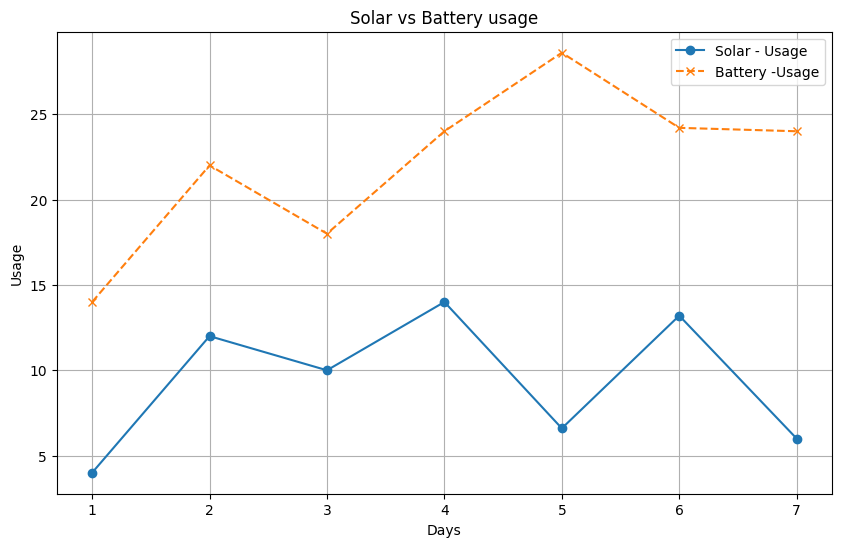

In [2]:
#Question 2: Solar Micro-Grid Simulation
#2.1. Prompt the user to enter daily demand values D1 and D2
#3x + 2y = D1
#4x + y = D2
solarPanels=[]
batteries=[]
D1=0.0
D2=0.0
def inputDailyDemandValues():
    global D1,D2
    D1 = float(input("Enter the value for D1: "))
    D2 = float(input("Enter the value for D2: "))

inputDailyDemandValues()

#2.2. Use scipy.linalg.solve() to calculate energy from solar panels and batteries
def solveLinalg(D1,D2,printResults=False):
    xy = np.array([[3,2],
             [4,1]])
    D1D2 = np.array([D1,D2])
    solution = linalg.solve(xy,D1D2)
    solarPanels.append(solution[0])
    batteries.append(solution[1])
    if printResults==True:
        print("Energy for Solar panels:", solution[0],"Energy for Batteries:", solution[1],end="\n\n")
    return solution
solveLinalg(D1,D2,True)

#2.3. Repeat for 7 days, storing results in a NumPy array.
print("Please input values for D1 and D2 recursively for a period of 7 days")
results = np.empty([0,2], dtype=float)
D1=0.0
D2=0.0

for day in range(0,7):
    D1 = float(input("Enter the value for D1: "))
    D2 = float(input("Enter the value for D2: "))
    results = np.append(results, [[solveLinalg(D1,D2)[0],solveLinalg(D1,D2)[1]]], axis=0)

print("\n=== Solar & Battery Usage (7 days) ===")
for i in range(0,len(results)):
    print(f"Day {i+1}: SolarPanel Energy= {results[i][0]:.1f}, Batteries\' Energy = {results[i][1]:.1f}",end="\n\n")


#2.4. Use statistics to compute mean, variance, and standard deviation of solar vs battery usage.
def convertUsageData(data,convertSolar=True):
    list=[]
    #solar
    if convertSolar:
         for i in range(0,len(data)):
            list.append(data[i][0].tolist())
    elif convertSolar==False:
    #battery
        for i in range(0,len(data)):
            list.append(data[i][1].tolist())
    #print(list)
    return list

def computeStatistics(data,itemName):
    print( itemName + " Statisitics data: ", "\nMean:", stat.mean(data), \
          "\nVariance:", stat.variance(data), "\nStandard deviation:", stat.stdev(data),end="\n\n")

computeStatistics( convertUsageData(results),"Solar Usage")
computeStatistics(convertUsageData(results,False),"Battery Usage")

#2.5. Plot daily solar vs battery usage.

def  plotSolarVsBatteryUsage():
    days = np.arange(1, 8)  # 7 days
    plt.figure(figsize=(10, 6))
    plt.plot(days, convertUsageData(results), marker='o', label=f"{'Solar'} - Usage")
    plt.plot(days, convertUsageData(results,False), marker='x', linestyle="--", label=f"{'Battery'} -Usage")
    plt.xlabel("Days" )
    plt.ylabel("Usage" )
    plt.title("Solar vs Battery usage")
    plt.legend()
    plt.grid(True)
    plt.show()
plotSolarVsBatteryUsage()


Fish Stock growth using Fibonacci growth: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

Fish Prices (UGX per kg): [12000, 12500, 11800, 13000, 12800, 13000, 13800, 12900, 13900, 14300, 14500, 15000, 14800, 16200, 15500]

Daily Revenue (UGX): [      0   12500   11800   26000   38400   65000  110400  167700  291900
  486200  797500 1335000 2131200 3774600 5843500]

=== Revenue Statistics ===
Mean   = 1006113.00
Median = 167700.00
Variance = 2895640004095.00
Risk Level: HIGH RISK 


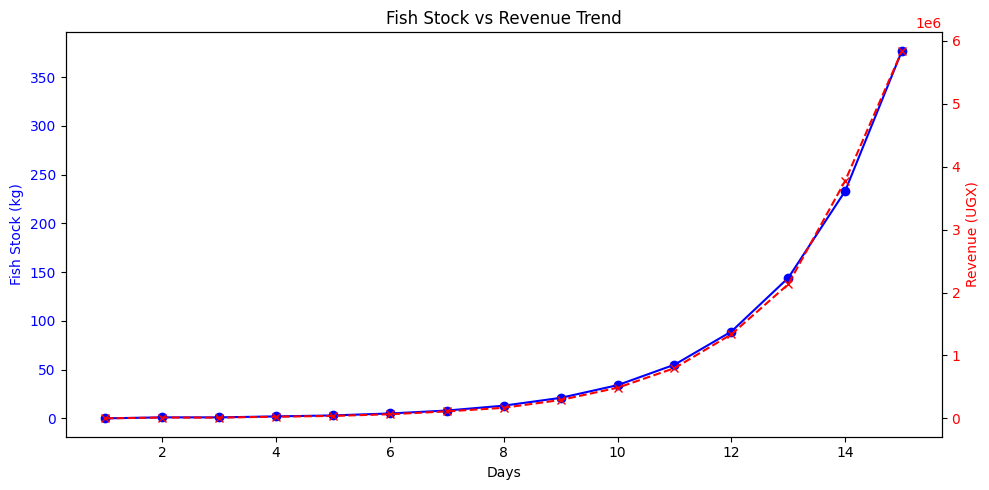

In [6]:

#Qn3
# 3.1 Generate 15 Fibonacci numbers for fish stock growth

def fibonacci(n):
    seq = [0, 1]
    for i in range(2, n):
        seq.append(seq[-1] + seq[-2])
    return seq[:n]

fish_stock = fibonacci(15)
print("Fish Stock growth using Fibonacci growth:", fish_stock)

# 3.2 Simulate fish prices in UGX per kg (15 days)
fish_prices = [12000, 12500, 11800, 13000, 12800,
               13000, 13800, 12900, 13900, 14300,
               14500, 15000, 14800, 16200, 15500]

print("\nFish Prices (UGX per kg):", fish_prices)

# Qn 3.3 Multiply stock × price → daily revenue
fish_stock = np.array(fish_stock)
fish_prices = np.array(fish_prices)

def computeRevenue():
    revenue = fish_stock * fish_prices
    return revenue

print("\nDaily Revenue (UGX):", computeRevenue())

# 3.4 Compute mean, median, variance

def computeRevenueStats():
    print("\n=== Revenue Statistics ===")
    print(f"Mean   = {stat.mean(computeRevenue()):.2f}")
    print(f"Median = {stat.median(computeRevenue()):.2f}")
    print(f"Variance = {stat.variance(computeRevenue()):.2f}")
computeRevenueStats()

# 3.5 Risk decision
if stat.variance(computeRevenue()) > 50000:
    print("Risk Level: HIGH RISK ")
else:
    print("Risk Level: LOW RISK ")

# 3.6 Plot fish stock vs revenue trend
days = np.arange(1, 16)

fig, axFish = plt.subplots(figsize=(10, 5))


# Fish stock line
axFish.set_xlabel("Days")
axFish.set_ylabel("Fish Stock (kg)", color="blue")
axFish.plot(days, fish_stock, marker='o', color="blue", label="Fish Stock")
axFish.tick_params(axis="y", labelcolor="blue")

# Revenue line (on second axis)
axRevenue = axFish.twinx()
axRevenue.set_ylabel("Revenue (UGX)", color="red")
axRevenue.plot(days, computeRevenue(), marker='x', color="red", linestyle="--", label="Revenue")
axRevenue.tick_params(axis="y", labelcolor="red")

plt.title("Fish Stock vs Revenue Trend")
fig.tight_layout()
plt.show()


Kampala Rainfall Data: [120 140 180 200 220 180  90  70  60 100 110 130]

Mean rainfall for Kampala = 133.33 mm
classify months as 'Good for maize' (>150mm) or'Drought risk' (<150mm)

Month 1: 120 mm --→ Drought risk
Month 2: 140 mm --→ Drought risk
Month 3: 180 mm --→ Good for maize
Month 4: 200 mm --→ Good for maize
Month 5: 220 mm --→ Good for maize
Month 6: 180 mm --→ Good for maize
Month 7: 90 mm --→ Drought risk
Month 8: 70 mm --→ Drought risk
Month 9: 60 mm --→ Drought risk
Month 10: 100 mm --→ Drought risk
Month 11: 110 mm --→ Drought risk
Month 12: 130 mm --→ Drought risk

Gulu Rainfall Data: [ 90 180 150 180 250 149  80  90 165 109 125 170]

Cosine similarity between Kampala & Gulu rainfall = 0.9656


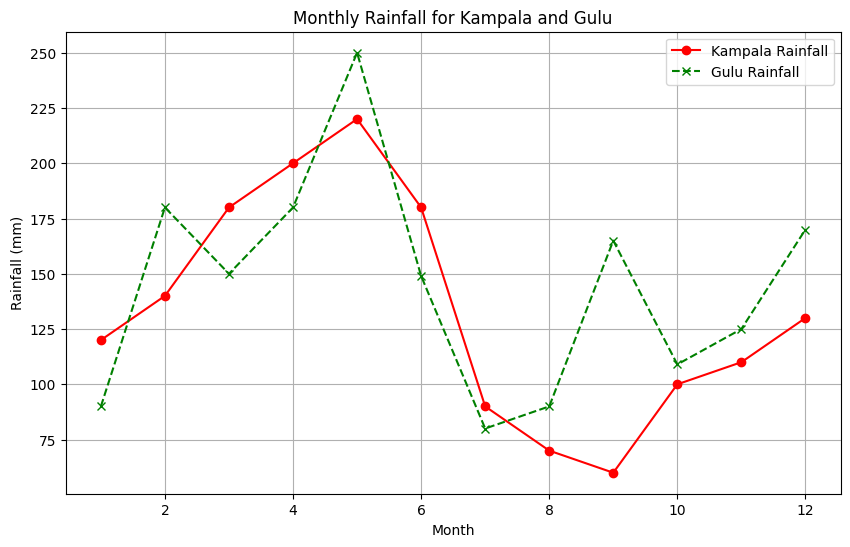

In [10]:

# 4.1 Store rainfall data in a NumPy array

kampalaRain = np.array([120, 140, 180, 200, 220, 180, 90, 70, 60, 100, 110, 130])
print("Kampala Rainfall Data:", kampalaRain)

# 4.2 Compute mean rainfall and classify months

meanRain = np.mean(kampalaRain)
print(f"\nMean rainfall for Kampala = {meanRain:.2f} mm")

print("classify months as 'Good for maize' (>150mm) or'Drought risk' (<150mm)",end="\n\n")
classification = ["Good for maize" if r > 150 else "Drought risk" for r in kampalaRain]
cc=zip(kampalaRain, classification)

for month, (rainfall, classificationLabel) in enumerate(zip(kampalaRain, classification), start=1):
    print(f"Month {month}: {rainfall} mm --→ {classificationLabel}")

# 4.3 Simulate Gulu rainfall with different values
guluRain = np.array([90, 180, 150, 180, 250, 149, 80, 90, 165, 109, 125, 170])
print("\nGulu Rainfall Data:", guluRain)

# 4.4 Compute cosine similarity between Kampala & Gulu
def calculate_cosine_similarity(vector1, vector2):

    if len(vector1) != len(vector2):
        raise ValueError("Vectors must have the same length.")

    dot_product = sum(v1 * v2 for v1, v2 in zip(vector1, vector2))
    magnitude_vector1 = math.sqrt(sum(v1**2 for v1 in vector1))
    magnitude_vector2 = math.sqrt(sum(v2**2 for v2 in vector2))

    if magnitude_vector1 == 0 or magnitude_vector2 == 0:
        return 0.0  # Avoid division by zero

    return dot_product / (magnitude_vector1 * magnitude_vector2)

print(f"\nCosine similarity between Kampala & Gulu rainfall = {calculate_cosine_similarity(kampalaRain,guluRain):.4f}")
# # Formula: cos(θ) = (A·B) / (||A|| * ||B||)
# dot_product = np.dot(kampala_rain, gulu_rain)
# norm_kampala = np.linalg.norm(kampala_rain)
# norm_gulu = np.linalg.norm(gulu_rain)
# cos_sim = dot_product / (norm_kampala * norm_gulu)

#print(f"\nCosine similarity between Kampala & Gulu rainfall = {cos_sim:.4f}")


# 4.5 Plot both regions’ rainfall

months = np.arange(1, 13)

plt.figure(figsize=(10, 6))
plt.plot(months, kampalaRain, marker='o', label="Kampala Rainfall", color="red")
plt.plot(months, guluRain, marker='x', linestyle="--", label="Gulu Rainfall", color="green")

plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.title("Monthly Rainfall for Kampala and Gulu")
plt.legend()
plt.grid(True)
plt.show()

Passenger counts (10 days): [35 40 42 50 55 60 48 52 47 45]

Daily Revenues: [ 70000  80000  84000 100000 110000 120000  96000 104000  94000  90000]

 Revenue Statistics 
Mean revenue = 94800.00
Variance     = 217066666.67
Std Deviation= 14733.18


Supply-Demand Solution [x=taxis, y=demand units]: [33.33333333 66.66666667]

Forecast passengers (Day 11) = 48.00
Forecast revenue (Day 11) = UGX 96000.00


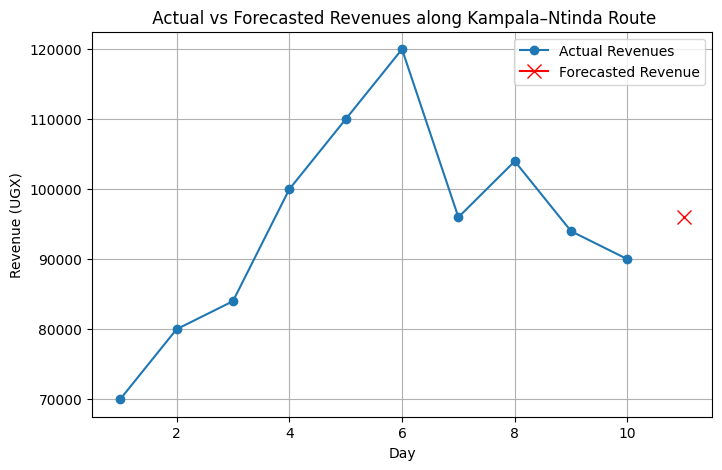

In [17]:

# 5.1 Store passenger counts in a NumPy array

passengers = np.array([35, 40, 42, 50, 55, 60, 48, 52, 47, 45])
print("Passenger counts (10 days):", passengers)

# 5.2 Compute daily revenues (UGX 2000 per passenger)

fare = 2000
revenues = passengers * fare
print("\nDaily Revenues:", revenues)


# 5.3 Compute mean, variance, std deviation

mean_rev = stat.mean(revenues.tolist())
var_rev = stat.variance(revenues.tolist())
std_rev = stat.stdev(revenues.tolist())

print("\nRevenue Statistics ")
print(f"Mean revenue = {mean_rev:.2f}")
print(f"Variance     = {var_rev:.2f}")
print(f"Std Deviation= {std_rev:.2f}",end="\n\n")

# ------------------------------
# 5.4 Simple supply-demand system using scipy.linalg.solve
# Example equations:
#   5x + 2y = 300   (x = taxis, y = demanded units)
#   7x + 4y = 500
# ------------------------------
A = np.array([[5, 2],
              [7, 4]])
b = np.array([300, 500])

supply_demand_solution = solve(A, b)
print("\nSupply-Demand Solution [x=taxis, y=demand units]:", supply_demand_solution)

# 5.5 Forecast 11th day's revenue using average of last 3 days
forecast_passengers = np.mean(passengers[-3:])
forecast_revenue = forecast_passengers * fare
print(f"\nForecast passengers (Day 11) = {forecast_passengers:.2f}")
print(f"Forecast revenue (Day 11) = UGX {forecast_revenue:.2f}")

# 5.6 Plot actual vs forecasted revenues
days_actual = np.arange(1, 11)
days_forecast = np.array([11])

plt.figure(figsize=(8, 5))
plt.plot(days_actual, revenues, marker='o', label="Actual Revenues")
plt.plot(days_forecast, forecast_revenue, marker='x', color="red", markersize=10, label="Forecasted Revenue")

plt.xlabel("Day")
plt.ylabel("Revenue (UGX)")
plt.title(" Actual vs Forecasted Revenues along Kampala–Ntinda Route")
plt.legend()
plt.grid(True)
plt.show()